# Load Library

In [1]:

from IPython.display import display, Math, Latex
from matplotlib import pyplot as plt


import numpy as np
import math

import pickle
import dill

###Plotting
from matplotlib import pyplot as plt

###Modules

import S_1_Near_Field_Recursive_2_state as get_Recursive
#import S1_Numerical as get_Numerical

import Ground_state_Numerical as get_Ground_n
import S_1_Far_Field_Recursive_2_state as get_fRecursive

# Define global Parameters 

In [2]:
l=1
m=1
gamma_c=0
s10_a=4.894289033

mu=-0.4151584241082508
gamma_c=0
alpha=3.4951309897- 0.117682*gamma_c-0.391600*gamma_c**2+0.191882*gamma_c**3-0.041828*gamma_c**4-0.041507*gamma_c**5 +0.033020*gamma_c**6
beta= 1.7526648513+ 0.703934*gamma_c-0.109101*gamma_c**2+0.013436*gamma_c**3+0.017778*gamma_c**4-0.018281*gamma_c**5 +0.005129*gamma_c**6
sigma=1+ beta/(-(1+mu)**(1/2))

# Get Numerical wave profiles

# $S_1$ Numerical: ground and excited states

In [3]:
z1,s1=np.load("profile.npy",allow_pickle=True )
z2,s2=np.load("profile_1.npy",allow_pickle=True )
z3,s3=np.load("profile_2.npy",allow_pickle=True )
z4,s4=np.load("profile_3.npy",allow_pickle=True )



(-1.0, 1.3)

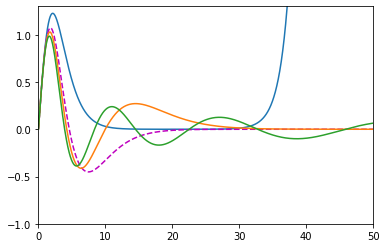

In [4]:
plt.plot(z1,s1)
plt.plot(z2,s2,'m--')
plt.plot(z3,s3)
plt.plot(z4,s4)
plt.xlim(0,50)
plt.ylim(-1,1.3)

# $S_0$ recursively

In [5]:
R2,S_0,V_0=np.loadtxt(f'Ground_State_recursive.txt', delimiter=',', skiprows=1,unpack=True )

# Plot ground State recurcuve 

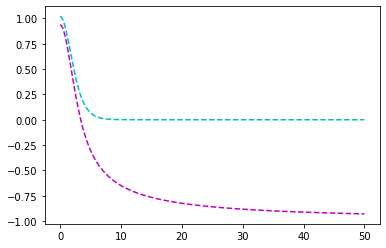

In [6]:

plt.plot(R2,S_0,'c--')
plt.plot(R2,V_0,'m--')

# Get recursive wave profile $S_1$

# Fetch Near Field


In [7]:
### Parameters from Far V fit

In [8]:
gamma_c=0
mu=-0.4151584241082508


In [9]:
sr=get_Recursive.phi_small_1(z1,gamma_c=0,mu=-0.41515843,nlimit=100)


In [10]:
sr5=get_Recursive.phi_small_1(z1,gamma_c=gamma_c,mu=mu,nlimit=15)
sr6=get_Recursive.phi_small_1(z1,gamma_c=gamma_c,mu=mu,nlimit=20)
sr6a=get_Recursive.phi_small_1(z1,gamma_c=gamma_c,mu=mu,nlimit=30)
sr6b=get_Recursive.phi_small_1(z1,gamma_c=gamma_c,mu=mu,nlimit=40)
sr6c=get_Recursive.phi_small_1(z1,gamma_c=gamma_c,mu=mu,nlimit=90)
sr6d=get_Recursive.phi_small_1(z1,gamma_c,mu,14)
sr7=get_Recursive.phi_small_1(z1,gamma_c,mu,15)
sr9=get_Recursive.phi_small_1(z1,gamma_c,mu,20)
sr8=get_Recursive.phi_small_1(z1,gamma_c,mu,50)

Visualization

(0.0, 10.0)

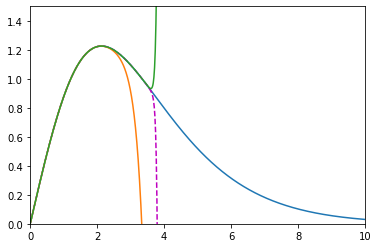

In [11]:
plt.plot(z1,s1)
plt.plot(z1,sr,'m--')


plt.plot(z1,sr5)
plt.plot(z1,sr6c)

plt.ylim(0,1.5)
plt.xlim(0,10)

## Fetch far field

In [12]:
mu=-0.4151584241082508




z1=z1.astype(float)
srf=get_fRecursive.phi_large_1(z1,s10_a,0,mu,nlimit=1,mlimit=2)


srf2=get_fRecursive.phi_large_1(z1,s10_a,0,mu,nlimit=1,mlimit=3)

srf3=get_fRecursive.phi_large_1(z1,s10_a,gamma_c=0,mu=mu,nlimit=1,mlimit=3)

srf4=get_fRecursive.phi_large_1(z1,s10_a,gamma_c=0,mu=mu,nlimit=1,mlimit=5)



## Whitaker Function

In [13]:
from mpmath import*

def func_W_s_far(r,a): # l is equal to 1 radial laplace solution
    mu=-0.4151584241082508
    l=1

    gamma_c=0
    beta= 1.7526648513+ 0.703934*gamma_c-0.109101*gamma_c**2+0.013436*gamma_c**3+0.017778*gamma_c**4-0.018281*gamma_c**5 +0.005129*gamma_c**6
    alpha=3.4951309897- 0.117682*gamma_c-0.391600*gamma_c**2+0.191882*gamma_c**3-0.041828*gamma_c**4-0.041507*gamma_c**5 +0.033020*gamma_c**6
    W=[]
    k=beta/np.sqrt(1+mu)
    constant2=np.sqrt(1/4 + l*(l+1)) # mu
    for i in range(0,len(r)):
        z=r[i]

        
        w_s=a* (2*z)**(-1)
        w= w_s*whitw(k, constant2, 2*z*(1+mu)**(1/2)) 
        
        w=float(w)
        W.append(w)
        
    W=np.array(W)
    
    return(W)


In [14]:
W1=func_W_s_far(z1,2.613936977)

# Plot Two-State Figures

In [15]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

##### Plot: Recursive vs Numerical 

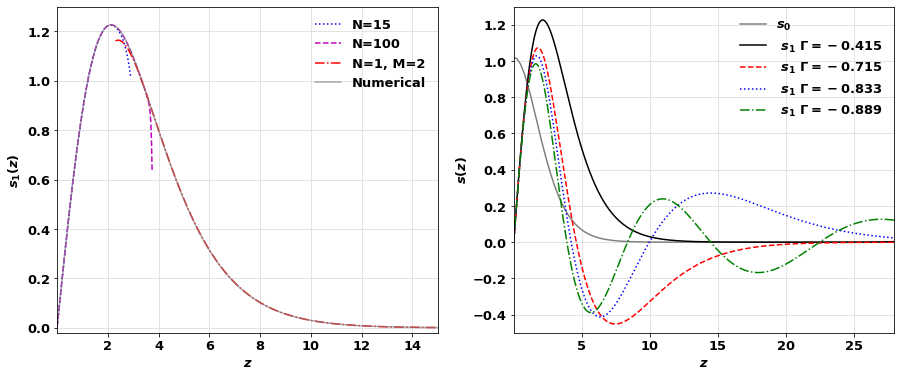

In [16]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size': 13})

fig,ax=plt.subplots(1,2,figsize=(15,6))

#ax[0].plot(z_n,S_n,'m--',label='N=100')
#ax[0].plot(z1,W1,'g--',label='Whittaker')


ax[0].plot(z1[0:290],sr5[0:290],'b:',label='N=15')

ax[0].plot(z1[0:375],sr[0:375],'m--',label='N=100')
#ax[0].plot(z1[0:260],sr8[0:260],'m--',label='N=15')
#ax[0].plot(z1[0:260],sr9[0:260],'y--',label='N=15')
#ax[0].plot(z_f,S_f,'r--',label='N=1, M=2')
#ax[0].plot(z1[150:],srf[150:],'g--',label='N=1, M=2')
#ax[0].plot(z1[180:],srfc[180:],'r--',label='N=3, M=2')
ax[0].plot(z1[230:],srf[230:],'r',linestyle='dashdot',label='N=1, M=2')
#ax[0].plot(z1[180:],srfd[180:],'r--',label='N=3, M=2')
#ax[0].plot(z1[180:],srfc[180:],'g--',label='N=1, M=2')
#ax[0].plot(z1[180:],srfd[180:],'g--',label='N=1, M=2')
#ax[0].plot(z1[200:],srfd[200:],'g--',label='N=1, M=2')
ax[0].set_ylabel('$s_1(z)$')#fontweight='bold')
ax[0].set_xlabel('$z$')#,fontweight='bold')
#ax[0].plot(R2,S_0,'gray',label='Non-Rotating Ground State')

ax[0].plot(z1,s1,color='gray',alpha=.65,label='Numerical')
ax[0].set_ylim(-0.02,1.3)
ax[0].set_xlim(.01,15)
ax[0].legend(frameon=False)
ax[0].grid(color='gainsboro')


#plt.plot(R,V)
###################################
ax[1].plot(R2,S_0,'gray',label='$s_0$ ')#Non-Rotating Ground State
ax[1].plot(z1,s1,color='black',label=' $s_1$ $\Gamma=-0.415$')
ax[1].plot(z2,s2,'r--',label=' $s_1$ $\Gamma=-0.715$')

#ax[1].plot(z3,s3,'b--',label=' $s_1$ Numerical $\Gamma=-.81$')
ax[1].plot(z3,s3,'b:',label=' $s_1$ $\Gamma=-0.833$')
ax[1].plot(z4,s4,'g',linestyle='dashdot',label=' $s_1$ $\Gamma=-0.889$')
#ax[1].plot(z5,s5,'b--',label=' $s_1$ Numerical $\Gamma=-.81$')
ax[1].set_xlabel('$z$')#,fontweight='bold')
ax[1].set_ylim(-.5,1.3)
ax[1].set_ylabel('$s(z)$')#fontweight='bold')
ax[1].set_xlim(0.01,28)
#ax[1].set_xscale('log')
ax[1].legend(frameon=False)
ax[1].grid(color='gainsboro')

#plt.savefig('Figure1_wavefunctions2.pdf')
plt.show()

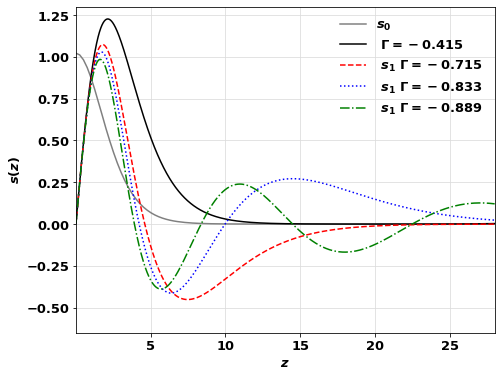

In [19]:


plt.figure(figsize=(7.5,6))
plt.plot(R2,S_0,'gray',label='$s_0$ ')#Non-Rotating Ground State
plt.plot(z1,s1,color='black',label=' $\Gamma=-0.415$')
plt.plot(z2,s2,'r--',label=' $s_1$ $\Gamma=-0.715$')

#plt.plot(z3,s3,'b--',label=' $s_1$ Numerical $\Gamma=-.81$')
plt.plot(z3,s3,'b:',label=' $s_1$ $\Gamma=-0.833$')
plt.plot(z4,s4,'g',linestyle='dashdot',label=' $s_1$ $\Gamma=-0.889$')
#plt.plot(z5,s5,'b--',label=' $s_1$ Numerical $\Gamma=-.81$')
plt.xlabel('$z$')#,fontweight='bold')
plt.ylim(-.65,1.3)
plt.ylabel('$s(z)$')#fontweight='bold')
plt.xlim(0.01,28)
#plt.xscale('log')
plt.legend(frameon=False)
plt.grid(color='gainsboro')

#plt.savefig('Figure1_wavefunctions2b.pdf')
plt.show()

##### Plot: Recursive vs Numerical vs Whittaker for Far field 

<ipython-input-18-94ae2079aab0>:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(z1[230:],srf[230:],'r--',linestyle='dashdot',label='N=1, M=2')


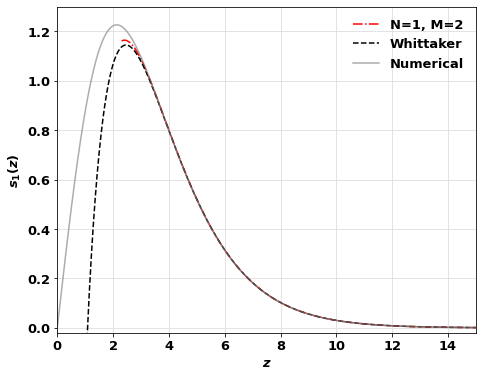

In [18]:
### from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(7.5,6))
#fig,ax=plt.plot(figsize=(15,6))

#ax[0].plot(z_n,S_n,'m--',label='N=100')

#plt.plot(z1[0:290],sr5[0:290],'b:',label='N=15')
#plt.plot(z1[0:375],sr[0:375],'m--',label='N=100')
#ax[0].plot(z_f,S_f,'r--',label='N=1, M=2')
plt.plot(z1[230:],srf[230:],'r--',linestyle='dashdot',label='N=1, M=2')
plt.plot(z1,W1,'black',linestyle='dashed',label='Whittaker')
plt.plot(z1,s1,color='gray',alpha=.65,label='Numerical')
plt.ylabel('$s_1(z)$')#fontweight='bold')
plt.xlabel('$z$')#,fontweight='bold')
#ax[0].plot(R2,S_0,'gray',label='Non-Rotating Ground State')


plt.ylim(-.02,1.3)
plt.xlim(0,15)
plt.legend(frameon=False)
plt.grid(color='gainsboro')
#plt.savefig('Figure1_wavefunctions2a.pdf')